In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

(300, 400, 3)
(300, 300, 3)


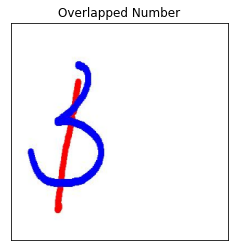

In [8]:
# Read the image
path = "C:/Users/rashi/Desktop/Elevator/overlap_dataset/overlap2/5.jpg"
image = cv2.imread(path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=(300,300),interpolation = cv2.INTER_AREA)
plt.imshow(image)
print(image.shape)
plt.title("Overlapped Number")
_ = plt.xticks([])
_ = plt.yticks([])

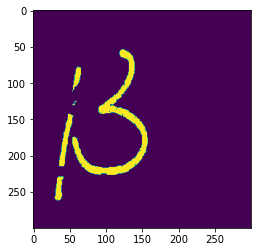

In [5]:
black_digit1 = list()
black_digit2 = list()
black_digit3 = list()

r,g,b = cv2.split(image)

#separate pixel position of red color digit
for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        if r[i,j]<20:
            black_digit1.append((i,j))
            
#separate pixel positions of blue color digit
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        if b[i,j]<30:
            black_digit3.append((i,j))
                   
#write both digits seperately and then merge them to create multidigit number 
red_number = np.ones((300,300))*255
for index in black_digit1:
    red_number[index[0],index[1]+30]=0
_, new_red_number = cv2.threshold(red_number, 127, 255, cv2.THRESH_BINARY_INV)

blue_number = np.ones((300,300))*255
for index in black_digit3:
    blue_number[index[0],index[1]-30]=0
_, new_blue_number = cv2.threshold(blue_number, 127, 255, cv2.THRESH_BINARY_INV)
merged_digits = cv2.add(new_red_number,new_blue_number)
merged_digits = cv2.resize(merged_digits, dsize=(300,300),interpolation = cv2.INTER_AREA)
cv2.imwrite('merged.jpg',merged_digits)
plt.imshow(merged_digits)
#plt.savefig('merged_20.jpg')

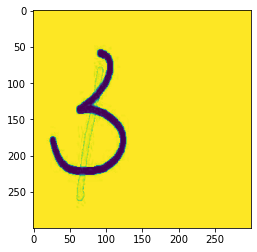

In [4]:
plt.imshow(r)

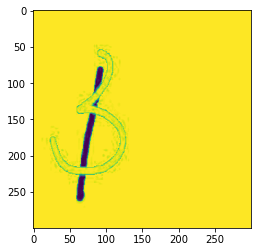

In [34]:
plt.imshow(b)

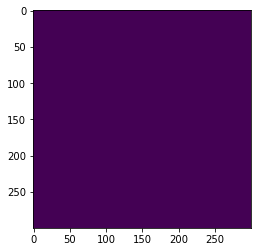

In [35]:
red_number = np.ones((300,300))*255
plt.imshow(red_number)

In [36]:
for index in black_digit1:
    red_number[index[0],index[1]+50]=0

Text(0.5, 1.0, 'Separated Number')

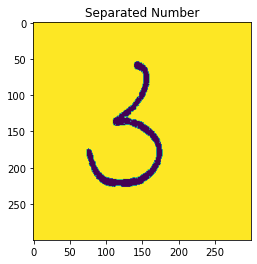

In [39]:
plt.imshow(red_number)
plt.title("Separated Number")

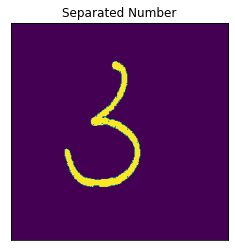

In [40]:
# Binary Inverse thresholding(Binarization)
_, new_red_number = cv2.threshold(red_number, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(new_red_number)
plt.title("Separated Number")
_ = plt.xticks([])
_ = plt.yticks([])
plt.savefig("Separated15_1.jpg")

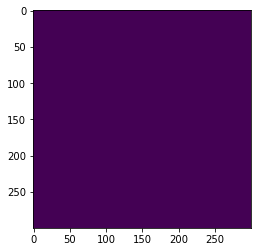

In [41]:
blue_number = np.ones((300,300))*255
plt.imshow(blue_number)

In [42]:
for index in black_digit3:
    blue_number[index[0],index[1]-40]=0

Text(0.5, 1.0, 'Separated Number')

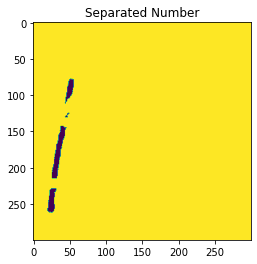

In [43]:
plt.imshow(blue_number)
plt.title("Separated Number")

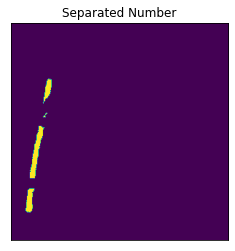

In [44]:
# Binary Inverse thresholding(Binarization)
_, new_blue_number = cv2.threshold(blue_number, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(new_blue_number)
plt.title("Separated Number")
_ = plt.xticks([])
_ = plt.yticks([])
plt.savefig("Separated15_2.jpg")

In [45]:
merged_digits = new_red_number + new_blue_number

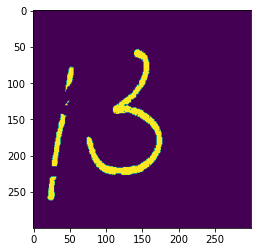

In [46]:
plt.imshow(merged_digits)

In [105]:
new_blue_number.shape

(300, 300)

In [106]:
for j in range(new_blue_number.shape[1]-1):
    for i in range(new_blue_number.shape[0]-1):
        if new_blue_number[i,j]==255:
            new_blue_number[i+1,j-1]=255
    

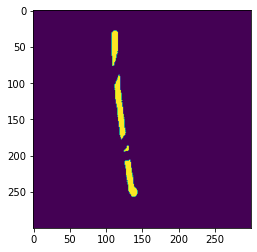

In [107]:
plt.imshow(new_blue_number)

In [50]:
red = np.uint8([[[0,0,255]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
hsv_red

array([[[  0, 255, 255]]], dtype=uint8)

In [25]:
img = image
# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

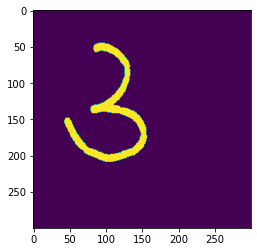

In [26]:
plt.imshow(mask)

In [31]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

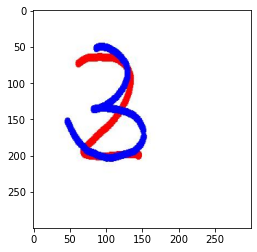

In [32]:
plt.imshow(img)

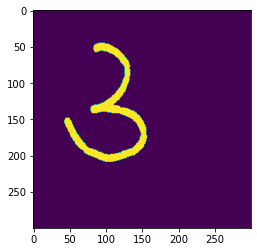

In [33]:
plt.imshow(mask)

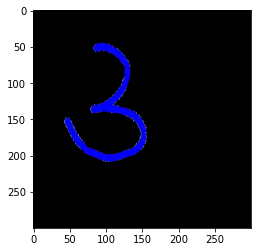

In [34]:
plt.imshow(res)

In [59]:
# Red color
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
low_red = np.array([0, 50, 50])
high_red = np.array([10, 255, 255])
red_mask = cv2.inRange(hsv, low_red, high_red)
red = cv2.bitwise_and(hsv, hsv, mask=red_mask)

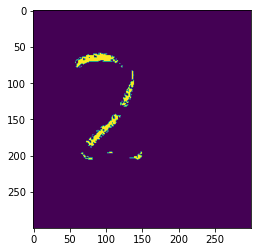

In [60]:
plt.imshow(red_mask)

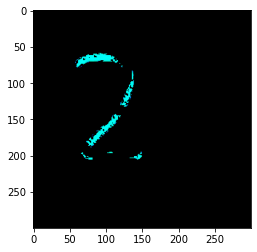

In [61]:
plt.imshow(red)

In [62]:
# Red color
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
low_red = np.array([170, 50, 50])
high_red = np.array([179, 255, 255])
red_mask2 = cv2.inRange(hsv, low_red, high_red)
red2 = cv2.bitwise_and(hsv, hsv, mask=red_mask2)

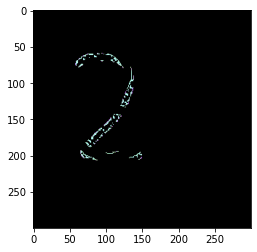

In [63]:
plt.imshow(red2)

In [64]:
merge_mask = red+red2

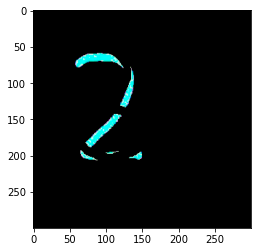

In [65]:
plt.imshow(merge_mask)

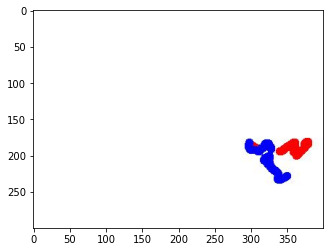

In [71]:
path = "C:/Users/rashi/Desktop/Elevator/overlap_dataset/overlap2/21.jpg"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [72]:
image.mean()

251.46519444444445

In [70]:
image.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'